In [1]:
!pip install mlflow==2.16.0
!pip install mlflow-skinny==2.16.0

## Import necessary libs

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import mlflow
from mlflow.models import infer_signature

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Creating mlflow experiment

In [3]:

mlflow.set_tracking_uri(uri="http://localhost:5000")

In [4]:
mlflow.set_experiment("MLOPS")

<Experiment: artifact_location='mlflow-artifacts:/863823201479661485', creation_time=1740539197926, experiment_id='863823201479661485', last_update_time=1740539197926, lifecycle_stage='active', name='MLOPS', tags={}>

### EDA

In [5]:

# Define the file path
file_path = "../../data/raw/02_Used_Car_Prices.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows
df


,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,175000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,1250000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,450000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,600000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,1774000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,475000.0
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,400000.0
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,290000.0
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,265000.0


Basic EDA

In [6]:
df.isnull().sum()


Brand_Model           0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price (INR Lakhs)     0
dtype: int64

In [7]:
df.describe()


,Year,Kilometers_Driven,Seats,Price (INR Lakhs)
count,6019.000000,6.019000e+03,5977.000000,6.019000e+03
mean,2013.358199,5.873838e+04,5.278735,9.479468e+05
std,3.269742,9.126884e+04,0.808840,1.118792e+06
min,1998.000000,1.710000e+02,0.000000,4.400000e+04
25%,2011.000000,3.400000e+04,5.000000,3.500000e+05
50%,2014.000000,5.300000e+04,5.000000,5.640000e+05
75%,2016.000000,7.300000e+04,5.000000,9.950000e+05
max,2019.000000,6.500000e+06,10.000000,1.600000e+07


In [8]:
df.dtypes


Brand_Model           object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price (INR Lakhs)    float64
dtype: object

In [9]:
df.duplicated().sum()


0

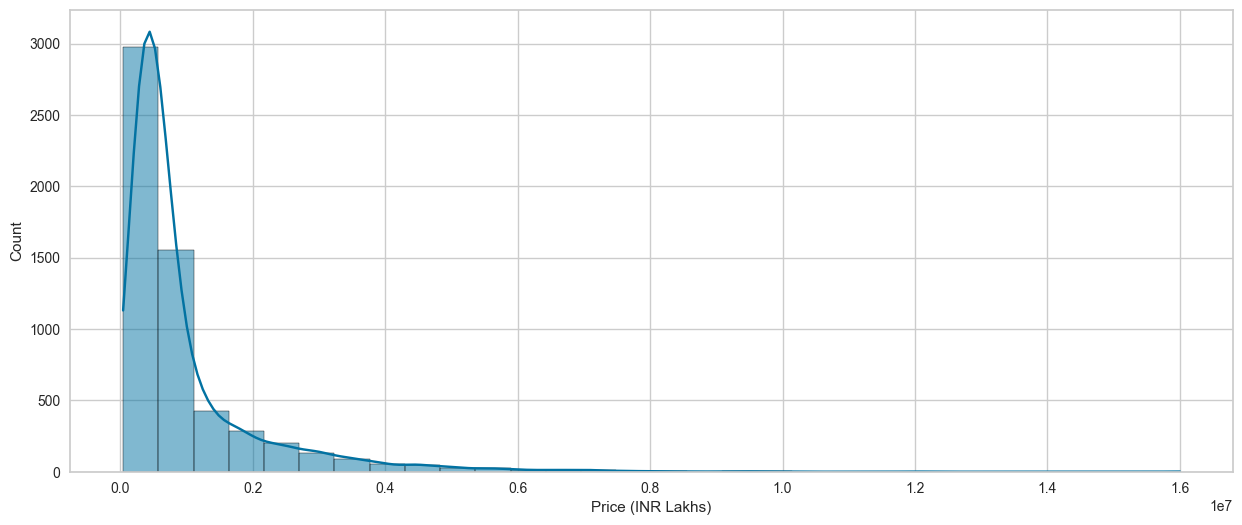

In [86]:
# Set figure size to be wider
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed
sns.histplot(df['Price (INR Lakhs)'], bins=30, kde=True)
plt.show()

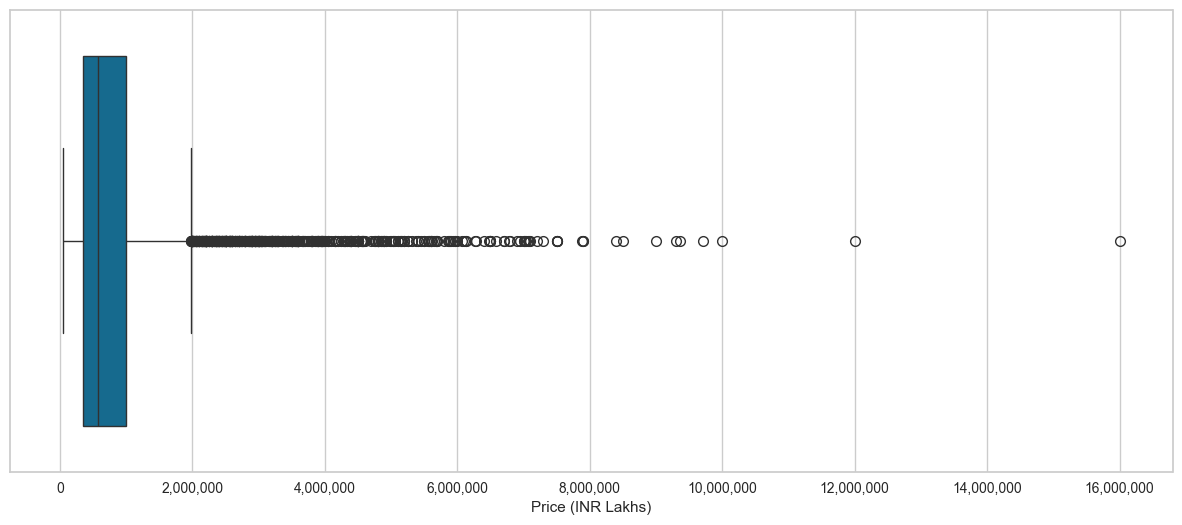

In [85]:
# Set figure size to be wider
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed
# Create the boxplot
sns.boxplot(x=df['Price (INR Lakhs)'])

# Set the x-axis ticks to display in normal numbers
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Show the plot
plt.show()

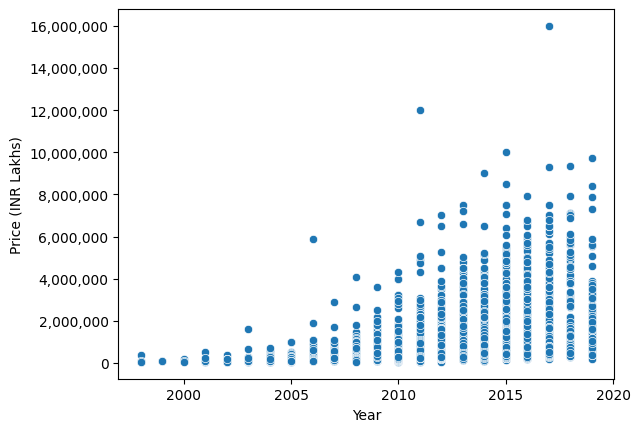

In [13]:
# Scatter plot
sns.scatterplot(x=df['Year'], y=df['Price (INR Lakhs)'])

# Set the y-axis formatter to display normal numbers using mticker
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

Typically newer cars tend to be more expensive

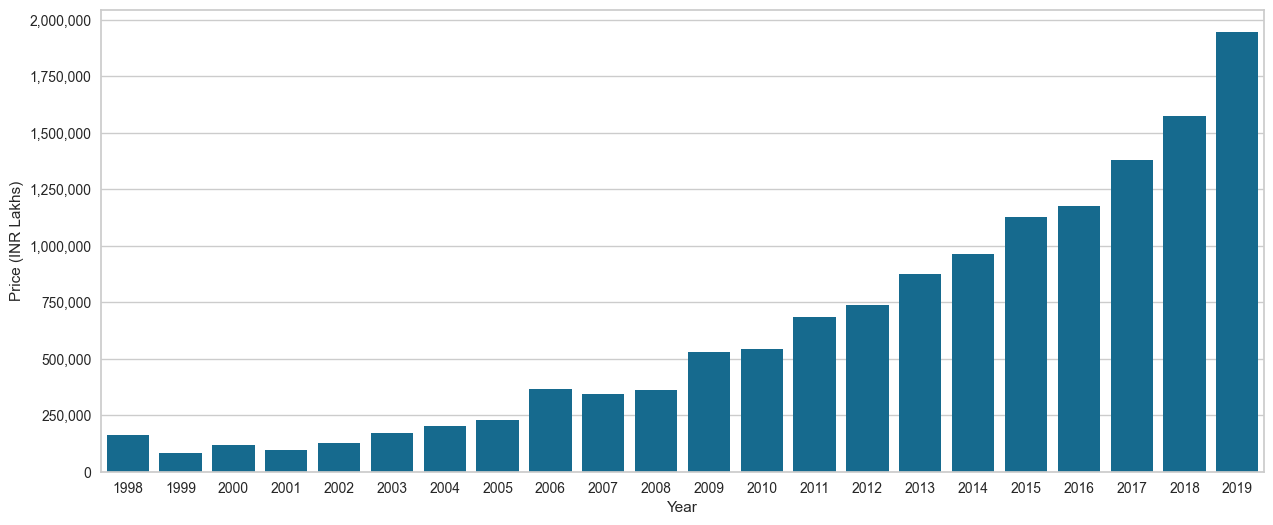

In [84]:
# Grouping by Year and calculating the average sale price
average_price_per_year = df.groupby('Year')['Price (INR Lakhs)'].mean().reset_index()
# Set figure size to be wider (before the plot)
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed
# Bar plot of average price per year
sns.barplot(x=average_price_per_year['Year'], y=average_price_per_year['Price (INR Lakhs)'])

# Set the y-axis formatter to display normal numbers using mticker
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

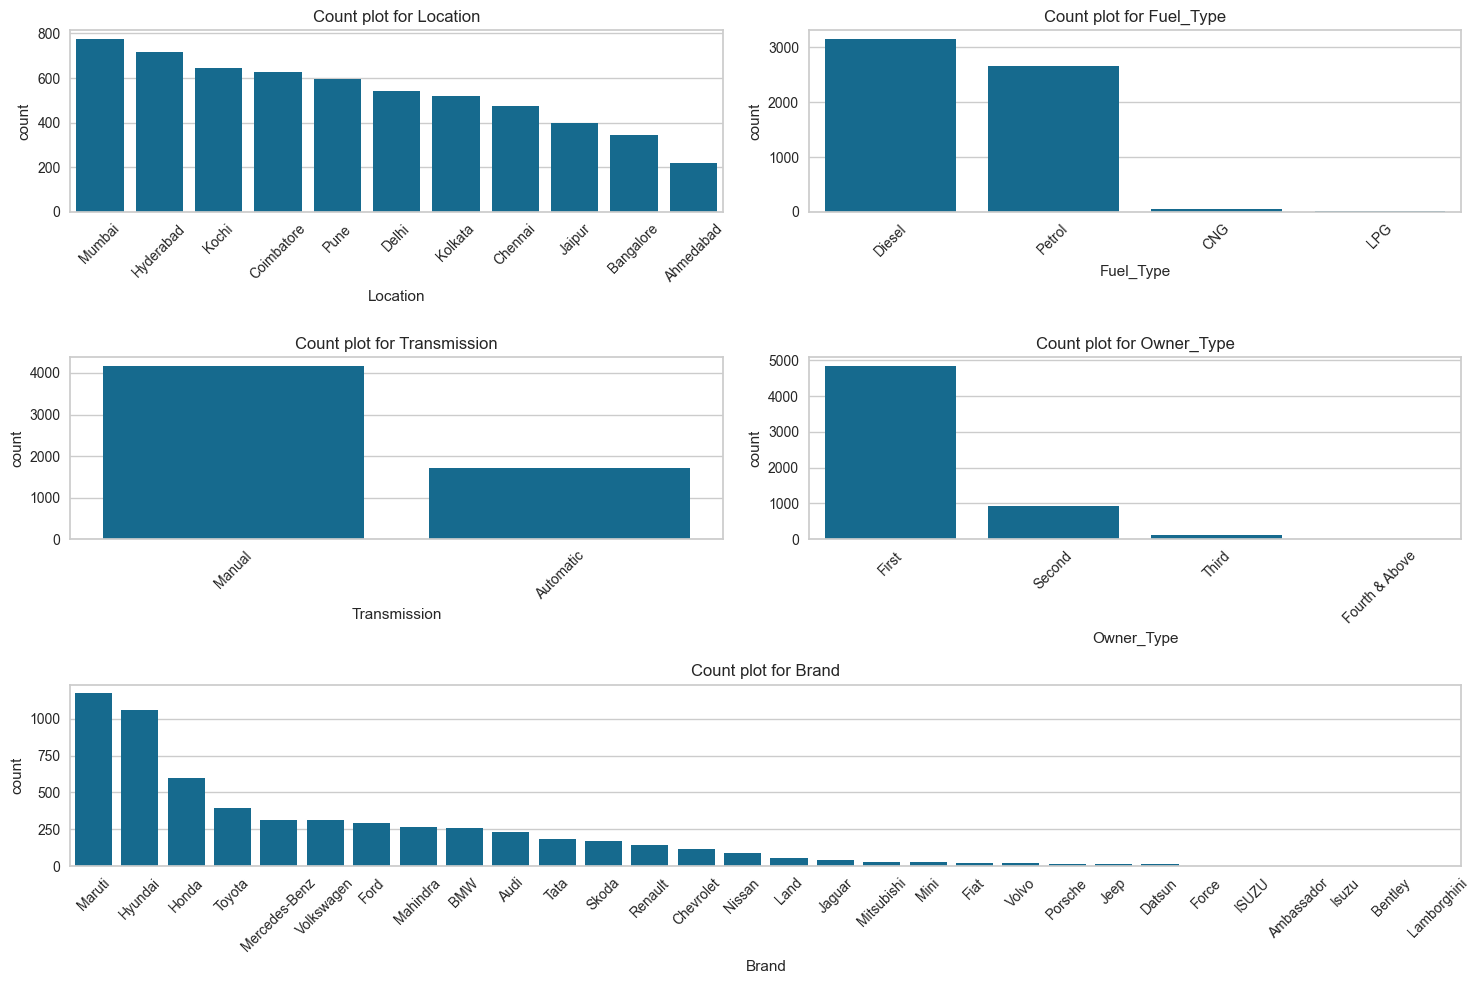

In [87]:
# Get the categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Plot each categorical column
plt.figure(figsize=(15, 10))

# Adjust the grid layout to span the bottom plot across
for i, col in enumerate(categorical_columns):
    if i < 4:  # For the first four subplots
        plt.subplot(3, 2, i+1)  # 3 rows, 2 columns
    else:  # For the last one (bottom plot)
        plt.subplot(3, 1, 3)  # Make the last plot span across the bottom row
    
    # Sort the values by count (from high to low)
    sorted_order = df[col].value_counts().index
    
    # Plot the count plot with sorted values
    sns.countplot(x=col, data=df, order=sorted_order)
    
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Insights from Categorical Data:

- **Location**: 
  - Mumbai has the highest count, followed by Hyderabad, Kochi, Coimbatore, and Pune. Ahmedabad has the least.

- **Fuel Type**: 
  - Diesel is more prevalent than Petrol in the dataset. CNG and LPG cars are relatively rare.

- **Transmission**: 
  - Manual transmission is far more common than automatic.

- **Owner Type**: 
  - The vast majority of cars are "First" owner cars. "Second" owner types are small, and "Third, Fourth & Above" is very small.

- **Brand**: 
  - Maruti is by far the most common car brand in the dataset, followed by Hyundai and Honda. Higher-end car brands are less common.


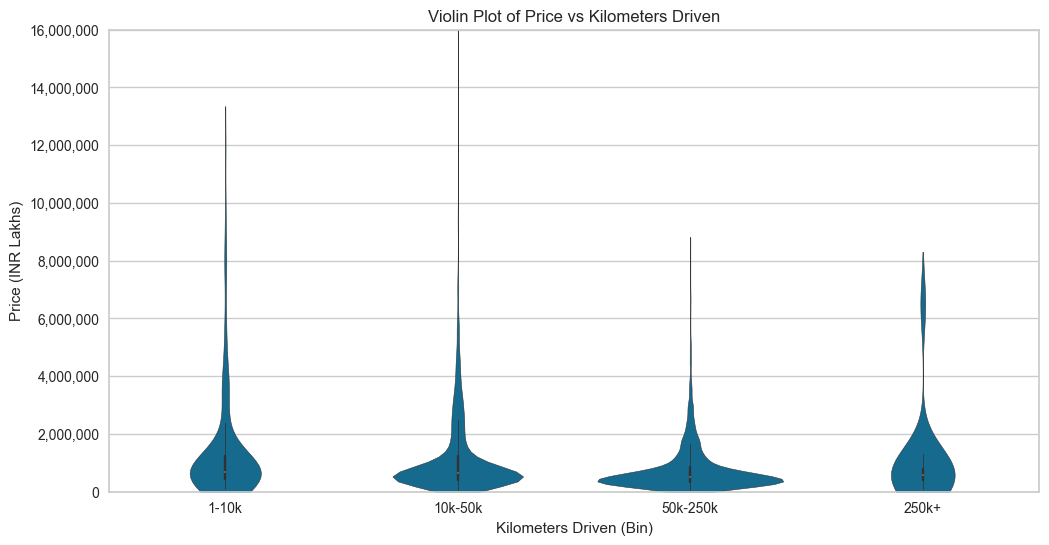

In [100]:
import matplotlib.ticker as mticker

# Define bins for kilometers driven as per your request
bins = [0, 10000, 50000, 250000, float('inf')]
labels = ['1-10k', '10k-50k', '50k-250k', '250k+']

# Create a new column 'Kilometer_Bin' for the categorized data
df['Kilometer_Bin'] = pd.cut(df['Kilometers_Driven'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Kilometer_Bin', y='Price (INR Lakhs)', data=df)

# Fix y-axis to avoid any negative or incorrect values
plt.ylim(0, df['Price (INR Lakhs)'].max())

# Add labels and title
plt.xlabel("Kilometers Driven (Bin)")
plt.ylabel("Price (INR Lakhs)")
plt.title("Violin Plot of Price vs Kilometers Driven")

# Format y-axis with normal numbers
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


In general, as cars are driven more, its prices are lower

In [97]:
print(df[df['Price (INR Lakhs)'].isna()])
print(df[df['Price (INR Lakhs)'] == float('inf')])


Empty DataFrame
Columns: [Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price (INR Lakhs), Brand, Kilometer_Bin]
Index: []
Empty DataFrame
Columns: [Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price (INR Lakhs), Brand, Kilometer_Bin]
Index: []


In [94]:
df['Price (INR Lakhs)'].min()

44000.0

C:\Users\User\AppData\Local\Temp\ipykernel_35040\1835998595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df['Fuel_Type'], y=df['Price (INR Lakhs)'], palette='Set2')


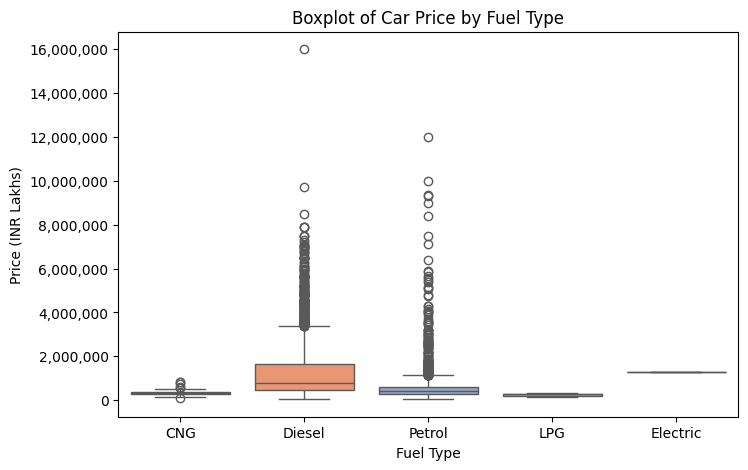

In [16]:

# Create boxplot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x=df['Fuel_Type'], y=df['Price (INR Lakhs)'], palette='Set2')

# Format the y-axis to show normal numbers
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Formats y-axis without scientific notation

# Labels and title
plt.xlabel("Fuel Type")
plt.ylabel("Price (INR Lakhs)")
plt.title("Boxplot of Car Price by Fuel Type")

plt.show()

Diesel cars in india tend to be more expensive compared to the other fuel types

Manual data cleaning for further eda

In [17]:
# Drop all rows with any null values
df = df.dropna()

# Verify the result
print(df.isnull().sum())

Brand_Model          0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price (INR Lakhs)    0
dtype: int64


There is a "null bhp" we need to take node of here

In [18]:
df['Power'].unique()


array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [19]:
# Check and filter rows where 'Power' is 'null bhp'
df = df[df['Power'] != 'null bhp']


In [20]:

df['Engine'] = df['Engine'].astype(str).str.replace(' CC', '').astype(float)

df['Power'] = df['Power'].astype(str).str.replace('bhp', '').astype(float)



In [21]:
df['Mileage'] = df['Mileage'].str.extract(r'([\d\.]+)').astype(float)


Engine and power have high multicolinearity.


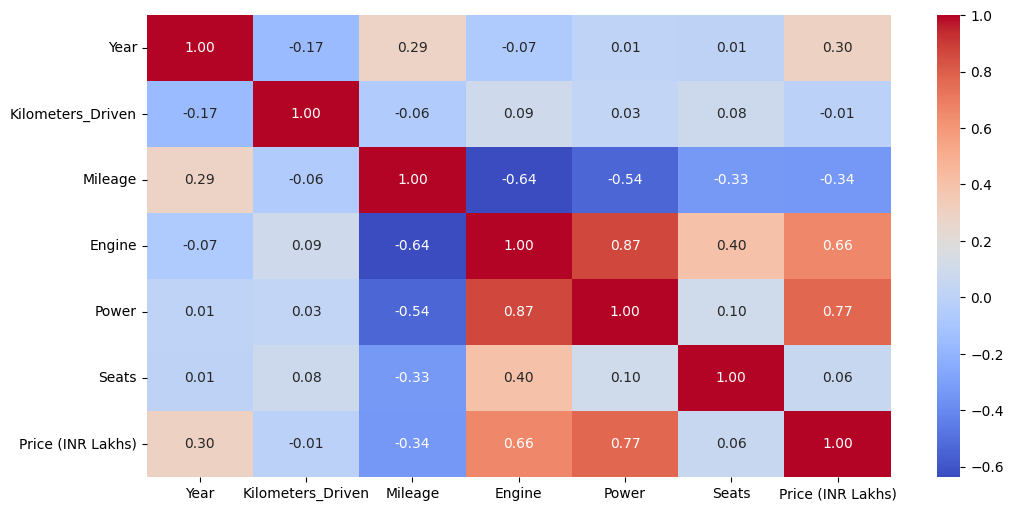

In [22]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns only
corr = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

- Mileage has negative correlation with almost all columns except year, which could mean as years increase mileage increase, showing that engines get more efficient
- engine and power are highly correlated. This is expected because a bigger engine is able to make more power
- And typically for a bigger engine, it would cost more. hence the high correlation with the target vairable

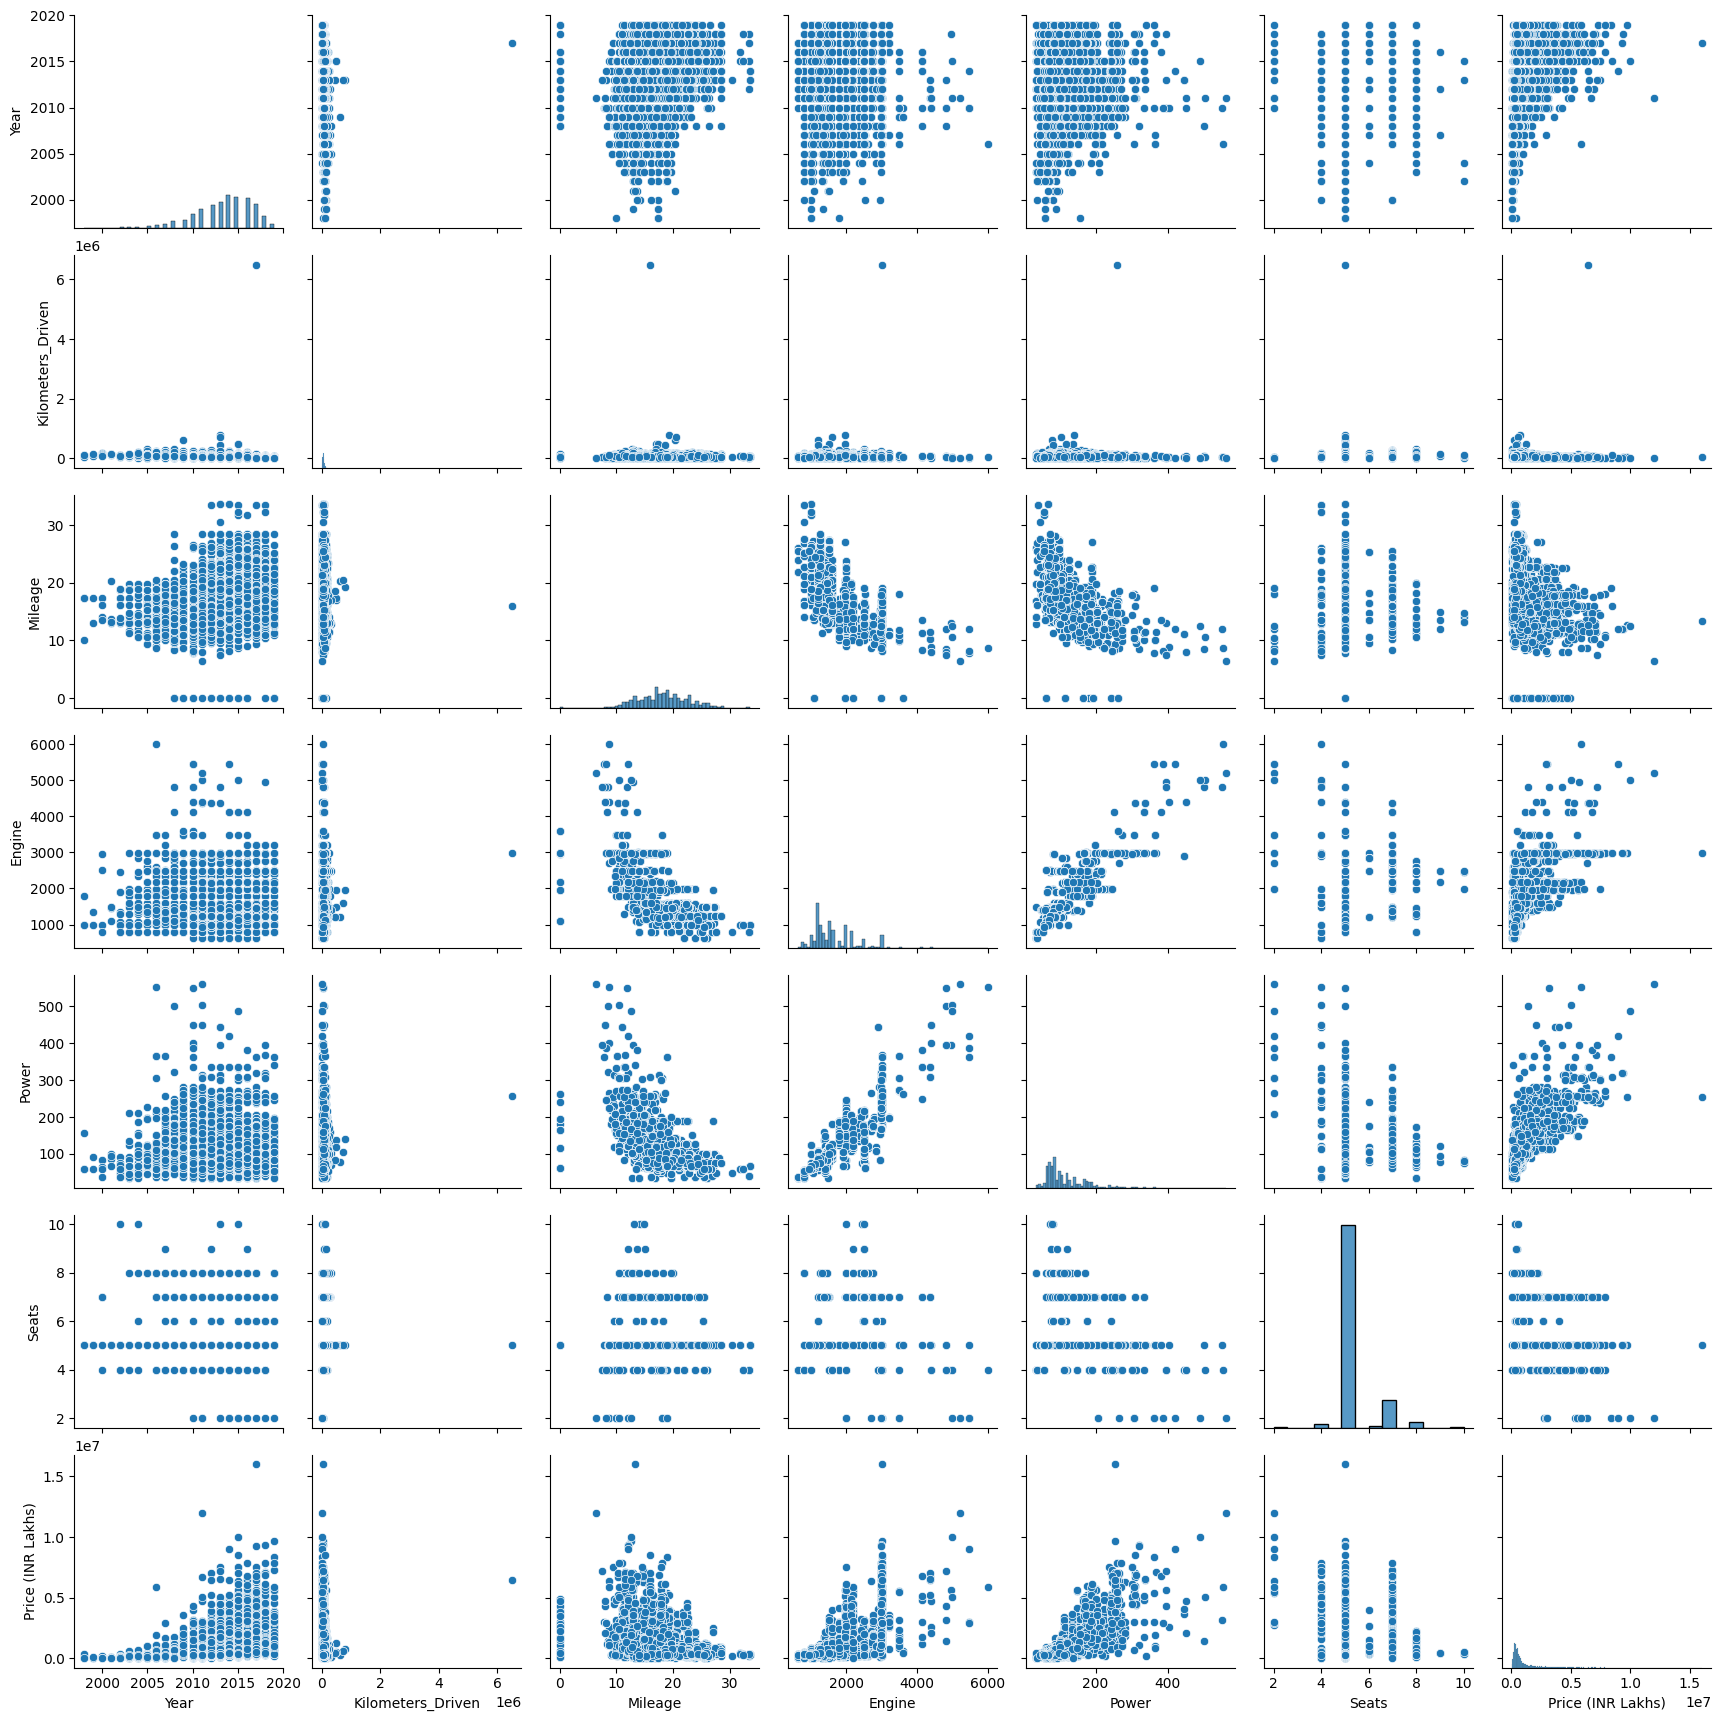

In [23]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create the pairplot
sns.pairplot(df[numerical_cols])

# Show the plot
plt.show()

#### Specific Trends (Pairwise Relationships)

- **Price (INR Lakhs) vs. Year**:  
  There is a generally positive trend, indicating that newer cars (higher 'Year') tend to have higher prices. The relationship is non-linear, showing a steeper increase in price with year in the later years.

- **Price (INR Lakhs) vs. Kilometers_Driven**:  
  There is a negative trend, suggesting that as the number of kilometers driven increases, the price tends to decrease. The relationship is not very strong, and there is a lot of scatter.

- **Price (INR Lakhs) vs. Mileage**:  
  A weak negative correlation. Higher mileage tends to be associated with lower prices, but the effect is not strong.

- **Price (INR Lakhs) vs. Engine**:  
  There is a positive correlation between engine size and price. Larger engines generally correspond to higher prices.

- **Price (INR Lakhs) vs. Power**:  
  A strong positive correlation. Higher power is associated with higher prices. This seems to be one of the strongest positive relationships in the plot.

- **Price (INR Lakhs) vs. Seats**:  
  A weak positive trend. Cars with more seats tend to have slightly higher prices on average, but there are many exceptions. The 'Seats' variable is discrete.

- **Mileage vs. Engine**:  
  There's a negative correlation between mileage and engine size. Cars with larger engines tend to have lower mileage.

- **Mileage vs. Power**:  
  Negative correlation. Cars with higher power tend to have lower mileage.

- **Engine vs. Power**:  
  A strong positive correlation. Larger engines generally produce more power.

- **Seats vs. other variables**:  
  The number of seats appears to be largely independent of other continuous variables.


Change to Brand as brand model is too unique

In [24]:
df['Brand_Model'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [25]:
# Extract the first word from the 'Brand_Model' column
df['Brand'] = df['Brand_Model'].str.split().str[0]

# Drop the old 'Brand_Model' column
df = df.drop(columns=['Brand_Model'])


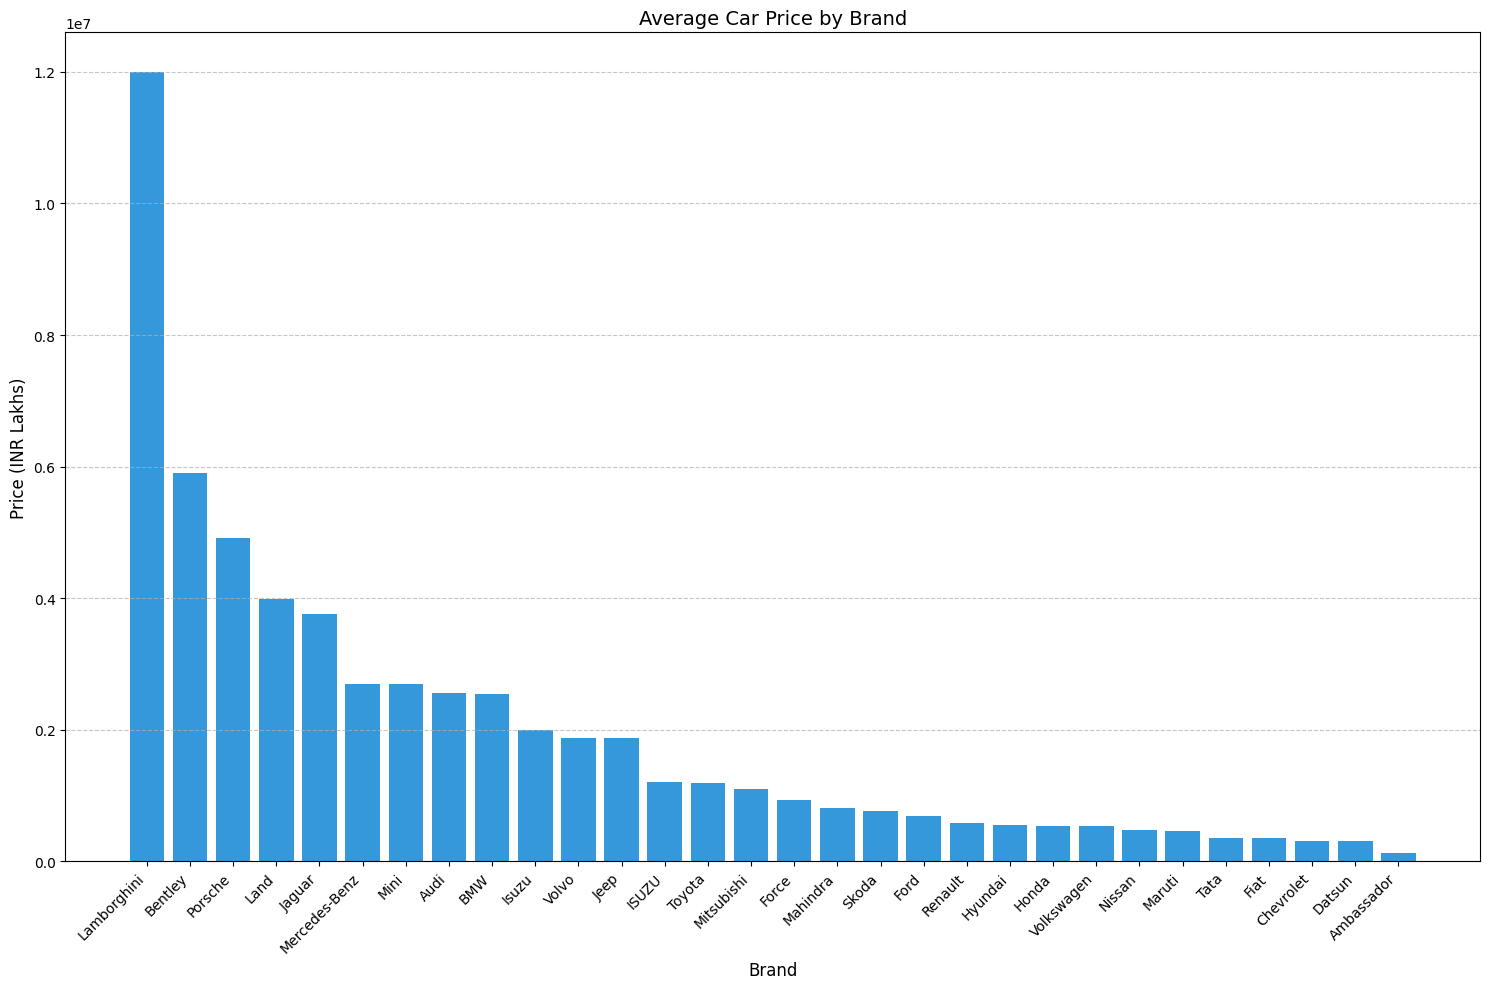

In [26]:
# Calculate average price by brand
avg_prices = df.groupby('Brand')['Price (INR Lakhs)'].mean().reset_index()
avg_prices = avg_prices.sort_values('Price (INR Lakhs)', ascending=False)

# Create a clean, focused bar chart
plt.figure(figsize=(15,10 ))
bars = plt.bar(avg_prices['Brand'], avg_prices['Price (INR Lakhs)'], color='#3498db')
plt.title('Average Car Price by Brand', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price (INR Lakhs)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Add value labels on top of each bar
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
#             f'{height:.2f}',
#             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Lamborghini bentley and porsche are the 3 highst priced cars on average. Chervolet, datsun and ambassador are the 3 lowest.

In [27]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs),Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,175000.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1250000.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,450000.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,600000.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,1774000.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,475000.0,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,400000.0,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,290000.0,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,265000.0,Maruti


In [28]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
list(categorical_features)
print(categorical_features)


Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'], dtype='object')


In [29]:
numeric_features = df.select_dtypes(include=['number']).columns
print(list(numeric_features))


['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price (INR Lakhs)']


In [30]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [31]:
unseen_test = df.tail(5)  # Take last 5 rows as unseen data
df = df.iloc[:-5]  # Remove last 5 rows from training data


# Pycaret


In [33]:
from pycaret.regression import *
from pycaret.regression import RegressionExperiment

Tried with polynomial_features=true and False. when true, best r2 = 87%. wheh it is false it performs better

In [34]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price (INR Lakhs),Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,175000.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1250000.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,450000.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,600000.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,1774000.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6009,Mumbai,2015,33500,Petrol,Automatic,First,19.16,2494.0,158.20,5.0,1975000.0,Toyota
6010,Delhi,2013,33746,Petrol,Manual,First,18.50,1198.0,86.80,5.0,320000.0,Honda
6011,Hyderabad,2009,53000,Petrol,Automatic,First,0.00,3597.0,262.60,5.0,475000.0,Skoda
6012,Coimbatore,2011,45004,Diesel,Manual,First,12.80,2494.0,102.00,7.0,948000.0,Toyota


In [36]:
numeric_features_list = df.select_dtypes(include=np.number).columns.tolist()
categorical_features_list = ['Brand', 'Location', 'Fuel_Type', 'Transmission']
ordinal_features_list = ['Owner_Type']
numeric_features_list = [i for i in numeric_features_list if i not in categorical_features_list + ordinal_features_list + ['Price (INR Lakhs)']]



exp1 = setup(df,
             transformation_method='quantile', #yeo-johnson gives error
             target='Price (INR Lakhs)',
             session_id=123,
             log_experiment=True,
             experiment_name='MLOPS',
             remove_outliers=True,
             normalize=True,
             normalize_method='zscore',
             numeric_features = numeric_features_list,
             categorical_features=['Location', 'Fuel_Type', 'Transmission', 'Brand'],
             transformation=True,
             transform_target=True,
             transform_target_method='quantile',
             ordinal_features = {'Owner_Type': ['First', 'Second', 'Third', 'Fourth & Above']},
             numeric_imputation='mean',
             remove_multicollinearity=True, # Remove multicollinearity
             multicollinearity_threshold=0.7, # Set threshold for multicollinearity
             rare_to_value = 0.1,
            
            )


,Description,Value
0,Session id,123
1,Target,Price (INR Lakhs)
2,Target type,Regression
3,Original data shape,"(5867, 12)"
4,Transformed data shape,"(5661, 21)"
5,Transformed train set shape,"(3900, 21)"
6,Transformed test set shape,"(1761, 21)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,4


In [37]:
pd.set_option('display.max_columns', None)

In [38]:
# Access X_train
X_train = get_config('X_train')

X_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
1102,Pune,2012,94900,Diesel,Manual,First,16.799999,1493.0,110.000000,5.0,Hyundai
4970,Hyderabad,2011,101999,Diesel,Automatic,First,16.730000,1995.0,218.000000,5.0,BMW
1171,Mumbai,2011,58000,Petrol,Manual,First,15.040000,1598.0,103.599998,5.0,Volkswagen
3335,Mumbai,2010,63298,Petrol,Automatic,First,14.530000,1794.0,138.100006,5.0,Toyota
706,Chennai,2017,34000,Diesel,Automatic,First,13.000000,2143.0,204.000000,5.0,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...
5351,Pune,2010,79000,Petrol,Manual,Third,16.469999,1198.0,73.900002,5.0,Volkswagen
4169,Kochi,2018,6279,Petrol,Manual,First,22.700001,799.0,53.639999,5.0,Datsun
1384,Mumbai,2016,62000,Petrol,Manual,First,18.500000,1197.0,85.800003,5.0,Maruti
3547,Kolkata,2016,12800,Petrol,Manual,First,19.440001,1198.0,67.000000,7.0,Datsun


In [39]:
transformed_target = get_config('y_transformed')
original_target = get_config('y')

print("Original target:")
print(original_target.describe())
print("\nTransformed target:")
print(transformed_target.describe())


Original target:
count        5867.0
mean       960924.0
std       1125274.0
min         44000.0
25%        352500.0
50%        575000.0
75%       1002500.0
max      16000000.0
Name: Price (INR Lakhs), dtype: float64

Transformed target:
count    5661.000000
mean        0.012417
std         0.987252
min        -3.635582
25%        -0.664287
50%         0.013801
75%         0.687815
max         5.199337
Name: Price (INR Lakhs), dtype: float64


train over 10 folds

In [40]:
# compare baseline models
best = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,159428.5760,170635274095.1319,392272.8965,0.8761,0.2205,0.1691,0.5830
lightgbm,Light Gradient Boosting Machine,166628.6394,173903068936.2166,399484.6849,0.8737,0.2308,0.1747,0.4250
rf,Random Forest Regressor,169044.2827,183195241706.2557,414766.4022,0.8638,0.2377,0.1802,0.2180
gbr,Gradient Boosting Regressor,190683.6049,193724066451.6773,428270.1227,0.8562,0.2571,0.2000,0.1220
et,Extra Trees Regressor,170720.7266,209459432135.5644,440123.6877,0.8480,0.2429,0.1818,0.1830
xgboost,Extreme Gradient Boosting,170830.4984,228372134297.6000,456984.0875,0.8317,0.2381,0.1789,0.0900
dt,Decision Tree Regressor,225054.0141,290286462545.0130,529985.0467,0.7803,0.3217,0.2489,0.0800
knn,K Neighbors Regressor,265123.4953,359318644326.4000,587188.2094,0.7367,0.3577,0.2860,0.0760
ada,AdaBoost Regressor,280322.0968,384915462826.6936,609349.7990,0.7105,0.3641,0.2813,0.1040
br,Bayesian Ridge,285656.5072,520533081902.4823,712333.0431,0.5839,0.3490,0.2943,0.0770


2025/02/26 16:08:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 16:08:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run CatBoost Regressor at: http://localhost:5000/#/experiments/863823201479661485/runs/a7fd869ecdf2467f9699767105762df7.
2025/02/26 16:08:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/863823201479661485.
2025/02/26 16:08:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 16:08:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Light Gradient Boosting Machine at: http://localhost:5000/#/experiments/863823201479661485/runs/51d4a71bfa814627bebcbb39526c8db5.
2025/02/26 16:08:25 INFO mlflow.tracking._tracking_service.c

get indepth into the train splits

In [41]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,164809.0842,94432860289.0281,307299.3008,0.9307,0.2133,0.1547
1,156512.0134,91448265235.4086,302404.1422,0.9225,0.2141,0.1660
2,189528.9927,358128069753.7314,598438.0250,0.8006,0.2254,0.1559
3,158736.8304,369288193239.9999,607690.8698,0.7810,0.1995,0.1465
4,128482.7343,56477729363.4271,237650.4352,0.9192,0.2154,0.1646
5,158859.2287,112666524801.8324,335658.3453,0.9223,0.2110,0.1577
6,170011.2100,297088498890.8728,545058.2527,0.7340,0.2869,0.2629
7,156544.1500,119861131860.9642,346209.6646,0.9197,0.1995,0.1505
8,165846.6583,115272348831.2088,339517.8181,0.9080,0.2247,0.1677


2025/02/26 16:08:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 16:08:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run CatBoost Regressor at: http://localhost:5000/#/experiments/863823201479661485/runs/57786c6c3012488a8c268dc5d282bb9b.
2025/02/26 16:08:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/863823201479661485.


Set the input example

In [42]:
X_transformed = get_config('X_transformed')
X_transformed

,Location_Pune,Location_Hyderabad,Location_Mumbai,Location_rare,Location_Kochi,Location_Coimbatore,Year,Kilometers_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_rare,Transmission,Owner_Type,Mileage,Power,Seats,Brand_Hyundai,Brand_rare,Brand_Maruti,Brand_Honda
1102,3.075023,-0.364326,-0.379956,-0.903597,-0.339473,-0.34833,-0.543520,1.308531,0.905472,-0.897993,-0.064183,0.621627,-0.434011,-0.400859,0.315745,-0.292179,2.121487,-1.047808,-0.496392,-0.328085
4970,-0.325201,2.744798,-0.379956,-0.903597,-0.339473,-0.34833,-0.801622,1.462407,0.905472,-0.897993,-0.064183,-1.608682,-0.434011,-0.421946,1.700480,-0.292179,-0.471368,0.954373,-0.496392,-0.328085
1171,-0.325201,-0.364326,2.631887,-0.903597,-0.339473,-0.34833,-0.801622,0.197657,-1.104397,1.113594,-0.064183,0.621627,-0.434011,-0.763103,0.230600,-0.292179,-0.471368,0.954373,-0.496392,-0.328085
3335,-0.325201,-0.364326,2.631887,-0.903597,-0.339473,-0.34833,-1.061226,0.383827,-1.104397,1.113594,-0.064183,-1.608682,-0.434011,-0.872930,0.679176,-0.292179,-0.471368,0.954373,-0.496392,-0.328085
706,-0.325201,-0.364326,-0.379956,1.106688,-0.339473,-0.34833,1.011924,-0.658484,0.905472,-0.897993,-0.064183,-1.608682,-0.434011,-1.150986,1.643732,-0.292179,-0.471368,0.954373,-0.496392,-0.328085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,-0.325201,-0.364326,-0.379956,1.106688,-0.339473,-0.34833,-1.703586,0.270905,-1.104397,1.113594,-0.064183,0.621627,2.257101,-0.035897,-1.529138,-0.292179,-0.471368,-1.047808,2.014539,-0.328085
6005,3.075023,-0.364326,-0.379956,-0.903597,-0.339473,-0.34833,0.620483,-0.535340,0.905472,-0.897993,-0.064183,0.621627,-0.434011,1.322631,-0.178548,-0.292179,-0.471368,-1.047808,2.014539,-0.328085
2771,-0.325201,-0.364326,-0.379956,1.106688,-0.339473,-0.34833,-0.801622,0.091517,0.905472,-0.897993,-0.064183,0.621627,-0.434011,-0.445925,0.526122,-0.292179,-0.471368,0.954373,-0.496392,-0.328085
2752,-0.325201,-0.364326,-0.379956,1.106688,-0.339473,-0.34833,1.011924,0.270905,-1.104397,1.113594,-0.064183,0.621627,-0.434011,0.648461,-1.792004,-0.292179,2.121487,-1.047808,-0.496392,-0.328085


In [68]:
# Assuming 'model' is your trained model and 'X' is a sample input
input_example = X_transformed.iloc[:5]  # Use the first 5 rows of your input data as an example

mlflow.sklearn.log_model(
    cb,
    "model",
    input_example=input_example,
    signature=mlflow.models.infer_signature(X_transformed, cb.predict(X_transformed))
)

In [44]:
best.get_params()

{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 123}

In [45]:
# to access the tuner object you can set return_tuner = True
tuned_cb, tuner = tune_model(cb, return_tuner=True, optimize = 'RMSE', search_library = 'optuna', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,195433.9061,137336086308.1206,370588.8373,0.8991,0.2486,0.1843
1,193391.5628,143319859585.2788,378576.0948,0.8785,0.2633,0.2077
2,217484.8800,407683120327.4062,638500.6815,0.7730,0.2504,0.1820
3,195449.7512,419002729364.5150,647304.2016,0.7516,0.2381,0.1801
4,153064.4044,78369216246.9393,279945.0236,0.8879,0.2369,0.1884
5,180181.8641,140715734653.6355,375120.9600,0.9030,0.2343,0.1814
6,188511.6046,243786673642.4420,493747.5809,0.7817,0.2960,0.2562
7,189505.5118,157560561092.5336,396938.9891,0.8944,0.2343,0.1877
8,193683.6397,147338642576.0310,383847.1604,0.8824,0.2621,0.2043


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2025/02/26 16:09:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 16:09:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run CatBoost Regressor at: http://localhost:5000/#/experiments/863823201479661485/runs/47326d7c3b574c7f8d0ea1755903f15c.
2025/02/26 16:09:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/863823201479661485.


Original performed the best, hence will use back best. 

And we will use backt the model evaluation above

In [46]:
tuned_cb

In [47]:
tuner

OptunaSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
               error_score='raise',
               estimator=Pipeline(memory=Memory(location=None),
                                  steps=[('target_transformation',
                                          TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                                                    random_state=123)))),
                                         ('numerical_imputer',
                                          TransformerWrapper(i...
                                    'actual_estimator__l2_leaf_reg': IntDistribution(high=200, log=True, low=1, step=1),
                                    'actual_estimator__n_estimators': IntDistribution(high=300, log=False, low=10, step=1),
                                    'actual_estimator__random_strength': FloatDistribution(high=0.8, log=False, low=0.0, step=None)},
               random_state=123, refit=False,
               scoring='neg_root_mean_squared_error',
               study=<optuna.study.study.Study object at 0x0000021C6DE44E10>,
               verbose=1)

Analysing performance

In [48]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

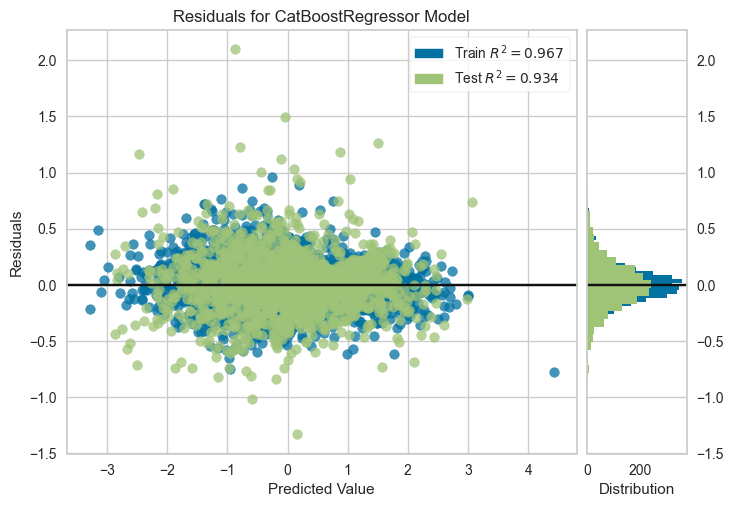

In [49]:
# plot residuals
plot_model(best, plot = 'residuals')

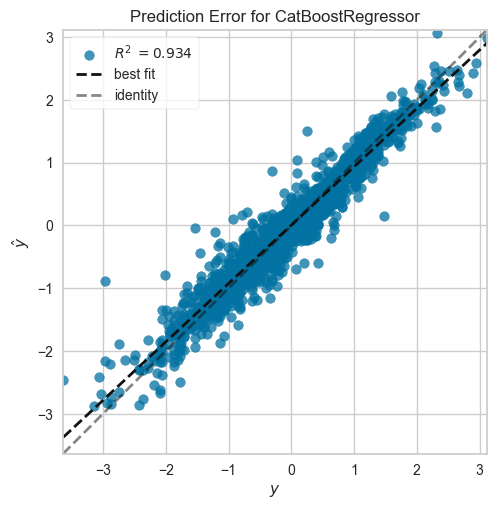

In [50]:
# plot error
plot_model(best, plot = 'error')

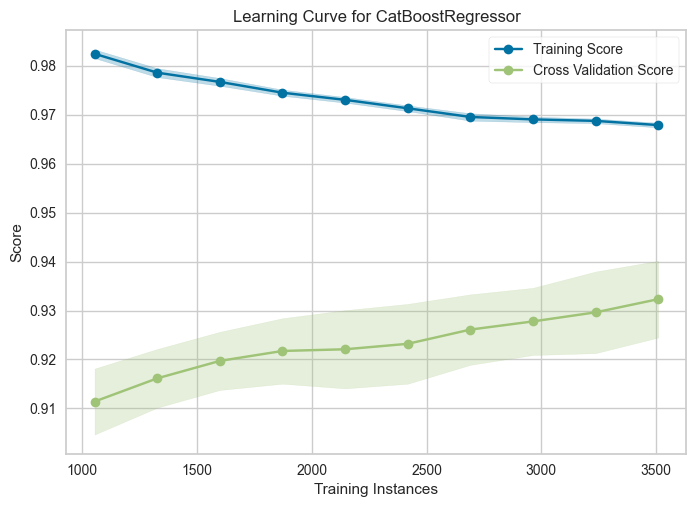

In [52]:
plot_model(best, plot='learning', plot_kwargs={'train_sizes': np.linspace(0.1, 1.0, 10)})

The training score decreases slightly with more training instances, while the cross-validation score increases. This suggests that the model may be slightly overfitting the training data, as the performance on unseen data (cross-validation) improves with more data, while the performance on the training data decreases.

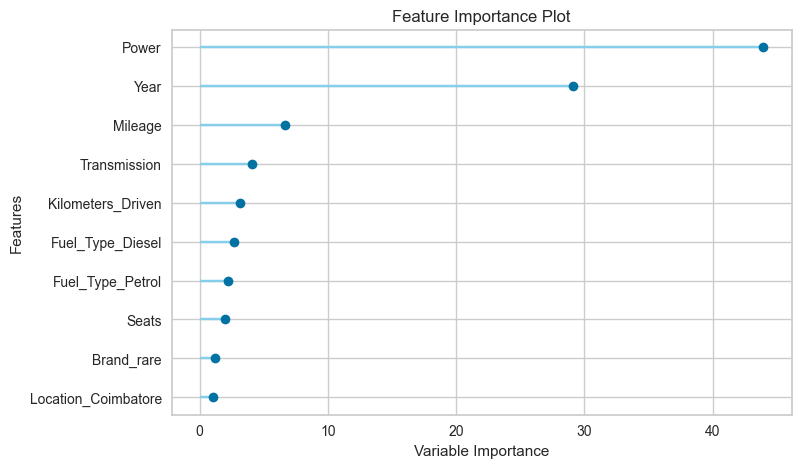

In [51]:
# plot feature importance
plot_model(best, plot = 'feature', plot_kwargs={'top_n': 15})

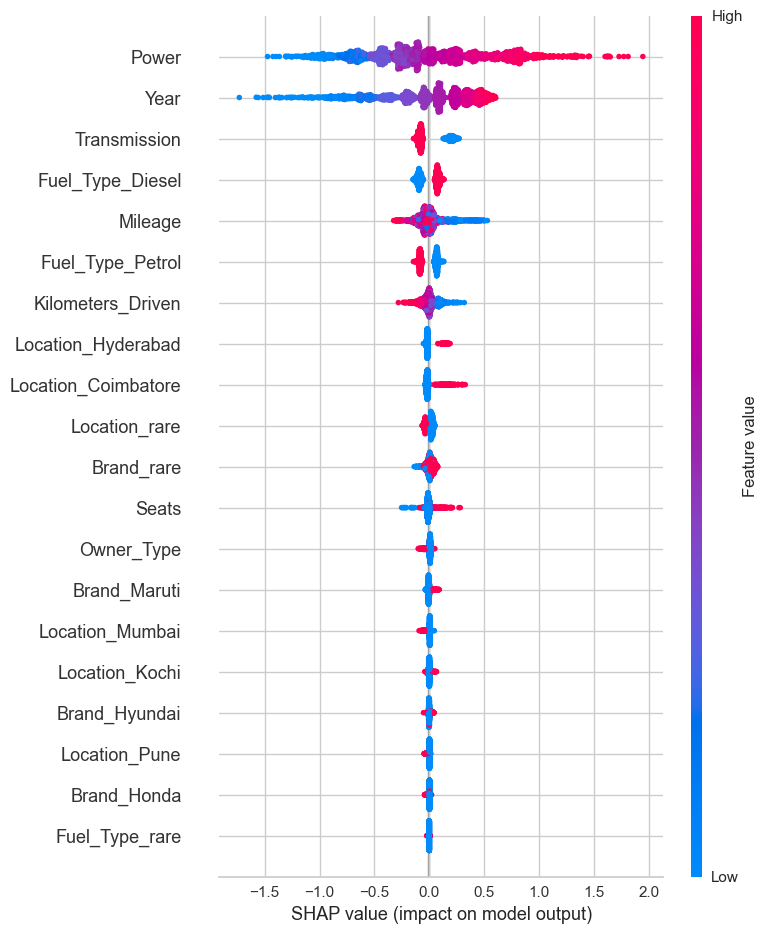

In [53]:
interpret_model(cb)

Power and year have the 2 largest impact on the price

Test with best model

In [54]:
new_data = unseen_test.copy()
new_data.drop('Price (INR Lakhs)', axis=1, inplace=True)
new_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.0,5.0,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.0,5.0,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.0,8.0,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,Maruti
6018,Hyderabad,2011,47000,Diesel,Manual,First,25.44,936.0,57.6,5.0,Chevrolet


In [55]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,prediction_label
6014,Delhi,2014,27365,Diesel,Manual,First,28.400000,1248.0,74.000000,5.0,Maruti,490000.0
6015,Jaipur,2015,100000,Diesel,Manual,First,24.400000,1120.0,71.000000,5.0,Hyundai,390000.0
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.000000,2498.0,112.000000,8.0,Mahindra,440000.0
6017,Kolkata,2013,46000,Petrol,Manual,First,18.900000,998.0,67.099998,5.0,Maruti,270000.0
6018,Hyderabad,2011,47000,Diesel,Manual,First,25.440001,936.0,57.599998,5.0,Chevrolet,275000.0


In [56]:
unseen_test['Price (INR Lakhs)']

6014    475000.0
6015    400000.0
6016    290000.0
6017    265000.0
6018    250000.0
Name: Price (INR Lakhs), dtype: float64

# Model explainability


In [57]:
# reason plot for test set observation 1
interpret_model(cb, plot = 'reason', observation = 1)

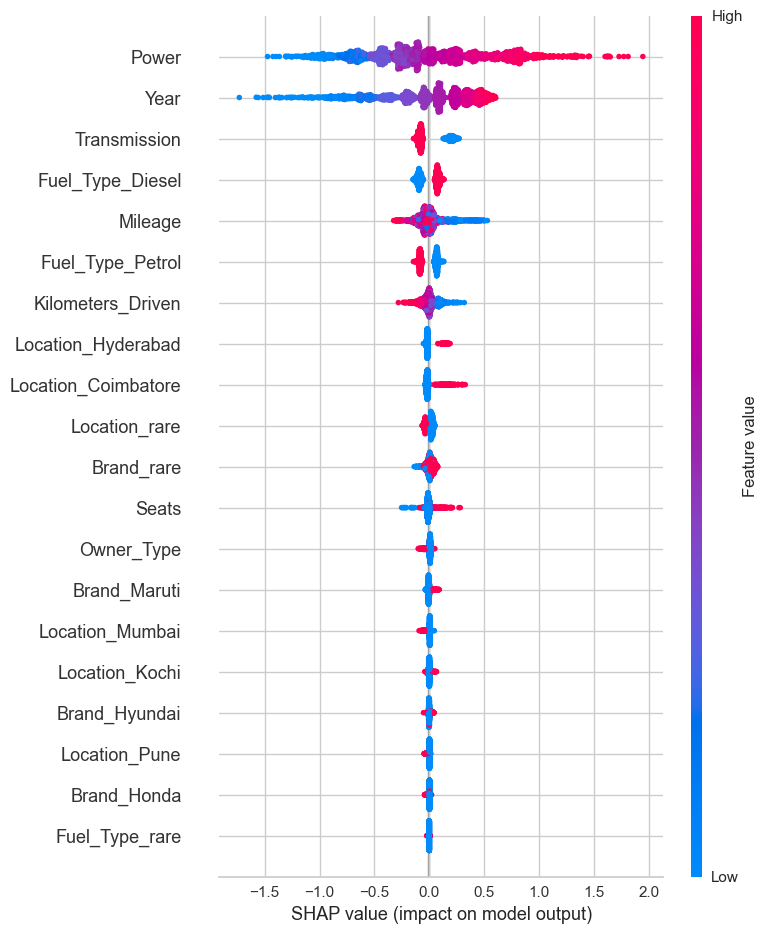

In [58]:
interpret_model(cb, plot = 'summary')

In [59]:
interpret_model(cb, plot='pdp', feature='Power')


* The PDP plot suggests that the 'Power' feature has a non-linear relationship with the average response. Initially, as 'Power' increases from negative values, the average response increases gradually. Around 'Power' = 0, the response increases more sharply, then the rate of increase slows down for higher values of 'Power'.

* The density plot shows the distribution of the 'Power' feature. You can see the frequency of different power values in your dataset.

# Save the pipeline

can compare and see that most predictions except the 3rd one is very close

In [60]:
save_model(best, 'best_car_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                            random_state=123)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Kilometers_Driven',
                                              'Mileage', 'Engine', 'Power',
                                              'Seats'],
                                     transformer=SimpleImputer())...
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                 ('transformation',
                  TransformerWrapper(transformer=QuantileTransformer(output_distribution='normal',
                                                                     random_state=123))),
                 ('norma

In [61]:
# load pipeline
loaded_best_pipeline = load_model('best_car_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\User\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                           random_state=123)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Year', 'Kilometers_Driven',
                                             'Mileage', 'Engine', 'Power...
                 TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                ('transformation',
                 TransformerWrapper(transformer=QuantileTransformer(output_distribution='normal',
                                                                    random_state=123))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x0000021C00930B90>)])

# Save the best model

Finalize model gives error when trying to add signature, but can add normally to cb

In [63]:
X_transformed.columns

Index(['Location_Pune', 'Location_Hyderabad', 'Location_Mumbai',
       'Location_rare', 'Location_Kochi', 'Location_Coimbatore', 'Year',
       'Kilometers_Driven', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Fuel_Type_rare', 'Transmission', 'Owner_Type', 'Mileage', 'Power',
       'Seats', 'Brand_Hyundai', 'Brand_rare', 'Brand_Maruti', 'Brand_Honda'],
      dtype='object')

In [ ]:
# save_model(cb, 'best_cb_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                            random_state=123)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Kilometers_Driven',
                                              'Mileage', 'Engine', 'Power',
                                              'Seats'],
                                     transformer=SimpleImputer())...
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                 ('transformation',
                  TransformerWrapper(transformer=QuantileTransformer(output_distribution='normal',
                                                                     random_state=123))),
                 ('norma

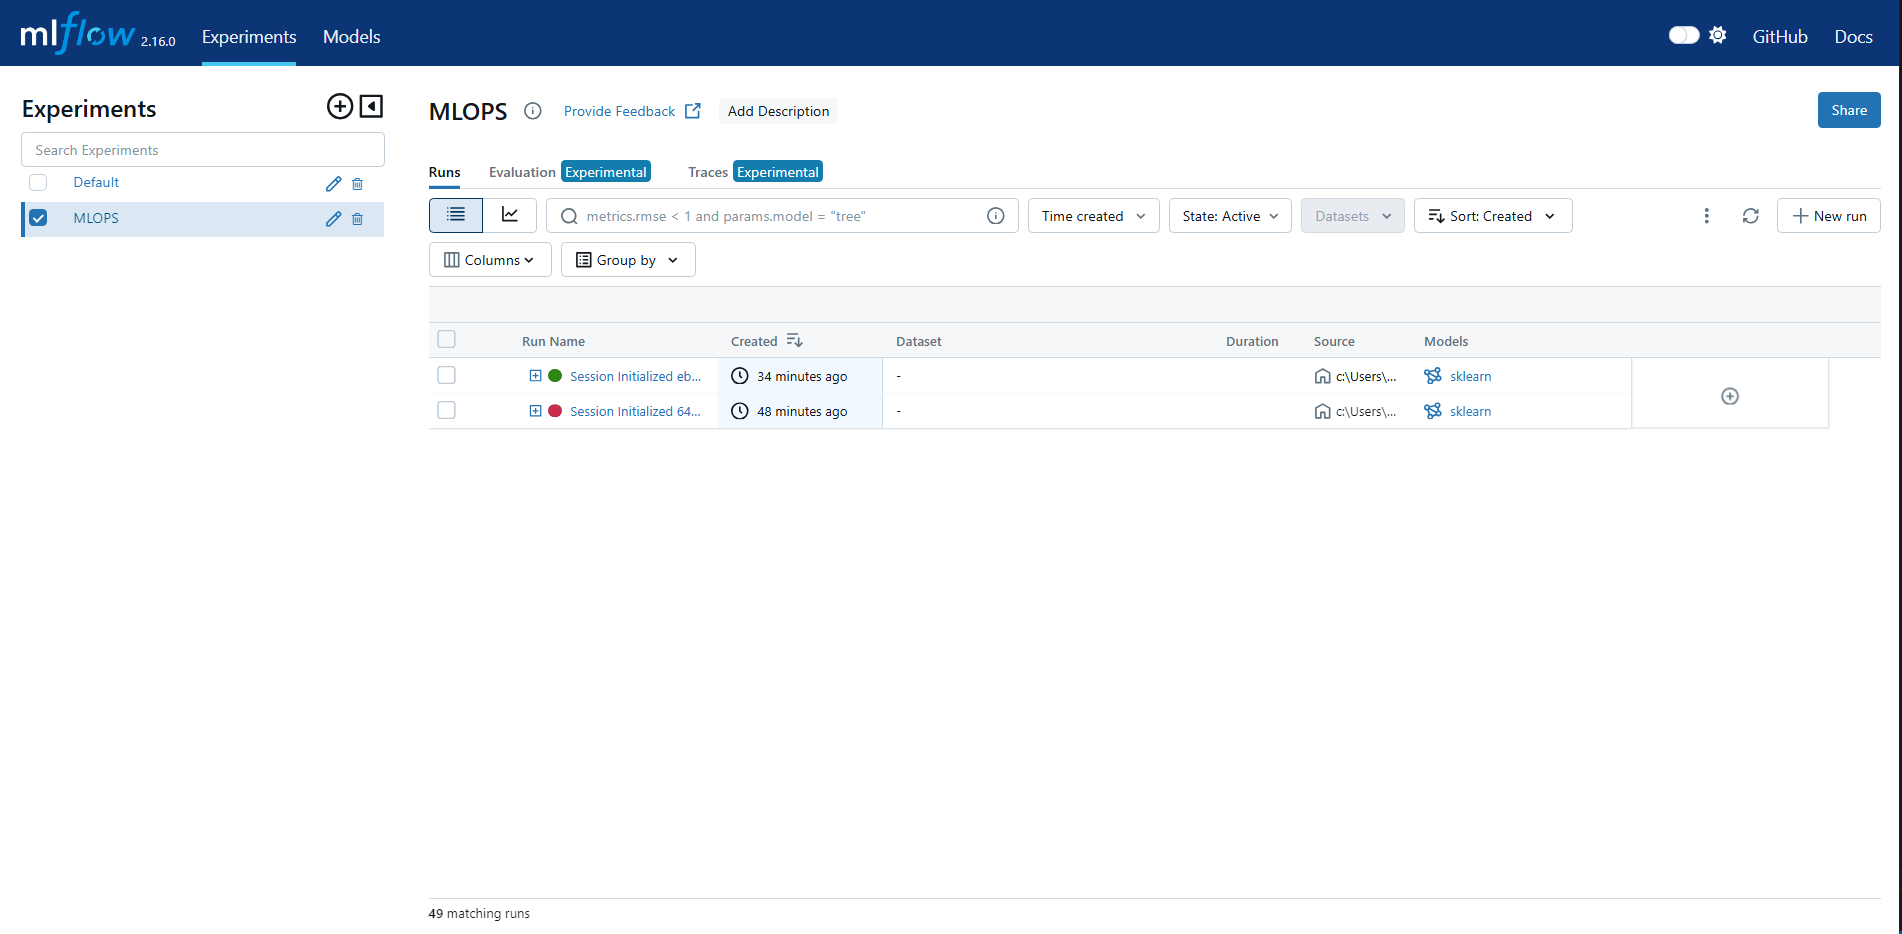

example curl request

curl -X POST "http://127.0.0.1:8000/predict" -H "Content-Type: application/json" -d "{ \"Location\": \"Pune\", \"Year\": 2012, \"Kilometers_Driven\": 94900, \"Fuel_Type\": \"Diesel\", \"Transmission\": \"Manual\", \"Owner_Type\": \"First\", \"Mileage\": 16.8, \"Engine\": 1493.0, \"Power\": 110.0, \"Seats\": 5.0, \"Brand\": \"Hyundai\" }"


# Register model

In [118]:
final_best = finalize_model(cb)
best_result = pull()
print(best_result)

2025/02/26 17:49:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/26 17:49:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run CatBoost Regressor at: http://localhost:5000/#/experiments/863823201479661485/runs/b269bab62ab74fb0aa7ca475a8f2fbee.
2025/02/26 17:49:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/863823201479661485.


              MAE           MSE         RMSE      R2   RMSLE    MAPE
Fold                                                                
0     195433.9061  1.373361e+11  370588.8373  0.8991  0.2486  0.1843
1     193391.5628  1.433199e+11  378576.0948  0.8785  0.2633  0.2077
2     217484.8800  4.076831e+11  638500.6815  0.7730  0.2504  0.1820
3     195449.7512  4.190027e+11  647304.2016  0.7516  0.2381  0.1801
4     153064.4044  7.836922e+10  279945.0236  0.8879  0.2369  0.1884
5     180181.8641  1.407157e+11  375120.9600  0.9030  0.2343  0.1814
6     188511.6046  2.437867e+11  493747.5809  0.7817  0.2960  0.2562
7     189505.5118  1.575606e+11  396938.9891  0.8944  0.2343  0.1877
8     193683.6397  1.473386e+11  383847.1604  0.8824  0.2621  0.2043
9     181970.2041  1.432984e+11  378547.6948  0.8797  0.2607  0.2021
Mean  188867.7329  2.018411e+11  434311.7224  0.8531  0.2525  0.1974
Std    15344.2785  1.123456e+11  114954.0164  0.0562  0.0182  0.0219


In [119]:
mean_metrics = best_result[['MAE', 'RMSE', 'R2', 'RMSLE']].mean()
print(mean_metrics)

MAE      174407.445017
RMSE     407698.580233
R2            0.786717
RMSLE         0.232950
dtype: float64



Test on some data to ensure it works correctly

In [110]:
predictions = predict_model(final_best, data = new_data)

In [111]:
predictions

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,prediction_label
6014,Delhi,2014,27365,Diesel,Manual,First,28.400000,1248.0,74.000000,5.0,Maruti,475000.000000
6015,Jaipur,2015,100000,Diesel,Manual,First,24.400000,1120.0,71.000000,5.0,Hyundai,386844.575663
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.000000,2498.0,112.000000,8.0,Mahindra,450000.000000
6017,Kolkata,2013,46000,Petrol,Manual,First,18.900000,998.0,67.099998,5.0,Maruti,269966.624625
6018,Hyderabad,2011,47000,Diesel,Manual,First,25.440001,936.0,57.599998,5.0,Chevrolet,265000.000000


In [112]:
unseen_test['Price (INR Lakhs)']

6014    475000.0
6015    400000.0
6016    290000.0
6017    265000.0
6018    250000.0
Name: Price (INR Lakhs), dtype: float64

In [113]:
save_model(final_best, 'best_cb_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                            random_state=123)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Kilometers_Driven',
                                              'Mileage', 'Engine', 'Power',
                                              'Seats'],
                                     transformer=SimpleImputer())...
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                 ('transformation',
                  TransformerWrapper(transformer=QuantileTransformer(output_distribution='normal',
                                                                     random_state=123))),
                 ('norma

In [127]:
import dagshub
dagshub.init(repo_owner='gangula-karthik', repo_name='MLOps-Assignment', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=3b74aff7-f0f6-401e-a5f9-d71c2c1b4765&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=e6f04116c50842aa5d6a76191a44aa03ccf41d8320c42b7788ca6af88c5831ee




Accessing as Afishally

Repository MLOps-Assignment doesn't exist, creating it under current user.

Initialized MLflow to track repo "gangula-karthik/MLOps-Assignment"

Repository gangula-karthik/MLOps-Assignment initialized!

In [128]:
mlflow.end_run()

In [129]:
with mlflow.start_run():
    mlflow.log_param("model_type", "scikit-learn pipeline")

    # Now, log the metrics using mlflow
    mlflow.log_metric("mae", mean_metrics['MAE'])
    mlflow.log_metric("rmse", mean_metrics['RMSE'])
    mlflow.log_metric("r2_score", mean_metrics['R2'])
    mlflow.log_metric("rmsle", mean_metrics['RMSLE'])

    model_uri =  mlflow.sklearn.log_model(final_best, "car_price_pipeline")
    
    model_details = mlflow.register_model(
        model_uri=model_uri.model_uri,
        name="CarPricingModel"
    )

    print("Model and metrics successfully logged to MLflow on DAGsHub!")

2025/02/26 19:40:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'CarPricingModel' already exists. Creating a new version of this model...
2025/02/26 19:40:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: CarPricingModel, version 2
Created version '2' of model 'CarPricingModel'.
2025/02/26 19:40:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run colorful-fish-17 at: http://localhost:5000/#/experiments/863823201479661485/runs/11db91343ffa49e0a85e3d7d5e6dfb68.
2025/02/26 19:40:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/863823201479661485.


Model and metrics successfully logged to MLflow on DAGsHub!


In [130]:
MODEL_NAME = "CarPricingModel"
MODEL_VERSION = "latest"  # You can specify a version like "1" if needed
model = mlflow.sklearn.load_model(f"models:/{MODEL_NAME}/{MODEL_VERSION}")
model

Pipeline(memory=Memory(location=None),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=QuantileTransformer(output_distribution='normal',
                                                                                                           random_state=123)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Year', 'Kilometers_Driven',
                                             'Mileage', 'Engine', 'Power',
                                             'Seats'],
                                    transformer=SimpleImputer())...
                 TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                ('transformation',
                 TransformerWrapper(transformer=QuantileTransformer(output_distribution='normal',
                                                                    random_state=123))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x0000021C0D881050>)])